In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM1/Project/absenteeism_data.csv/absenteeism_data.csv', delimiter=';')

Mounted at /content/drive


# Dataset Analysis

In [3]:
data # head, tail, shape

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,13,...,No,1,2,Y,No,1,90,172,30,4
1,36,Unspecified,July,Tuesday,NaN,0.0,118,13,26,18,...,Yes,1,1,Y,No,0,98,178,31,0
2,3,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,18,...,No,1,0,Yes,No,0,89,170,31,2
3,7,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,14,...,No,1,2,Yes,Yes,0,68,168,24,4
4,11,Medical consultation,July,Thursday,Summer,0.0,289,36,69,13,...,No,1,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,11,Diseases of the genitourinary system,July,Tuesday,Summer,0.0,289,36,69,13,...,No,1,2,Yes,No,1,90,172,30,8
796,1,Diseases of the digestive system,July,Tuesday,Summer,0.0,235,11,20,14,...,No,3,1,No,No,1,88,172,29,4
797,4,Unspecified,NaN,Tuesday,Summer,0.0,118,14,34,13,...,No,1,1,Yes,No,8,98,170,34,0
798,8,Unspecified,NaN,Wednesday,NaN,0.0,231,35,63,14,...,No,1,2,Yes,No,2,100,170,35,0


In [4]:
data.info() #check the data types of the variables and how many are from the DataFrame resources and whether or not there are missing values in any of them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               800 non-null    int64  
 1   Reason for absence               740 non-null    object 
 2   Month of absence                 737 non-null    object 
 3   Day of the week                  740 non-null    object 
 4   Seasons                          573 non-null    object 
 5   Days since previous absence      781 non-null    float64
 6   Transportation expense           800 non-null    int64  
 7   Distance from Residence to Work  800 non-null    int64  
 8   Estimated commute time           800 non-null    int64  
 9   Service time                     800 non-null    object 
 10  Years until retirement           800 non-null    int64  
 11  Date of Birth                    800 non-null    object 
 12  Disciplinary failure  

In [5]:
# Print the unique values by feature in the data DataFrame
print("Unique values by feature:\n", data.nunique().sort_values())

Unique values by feature:
 Days since previous absence         1
Disciplinary failure                2
Social drinker                      3
Social smoker                       3
Education                           4
Seasons                             4
Number of children                  5
Day of the week                     6
Number of pets                      6
Month of absence                   12
Height                             14
Body mass index                    17
Service time                       19
Absenteeism time in hours          19
Years until retirement             22
Transportation expense             24
Distance from Residence to Work    25
Weight                             27
Reason for absence                 28
Estimated commute time             29
Date of Birth                      36
ID                                 36
dtype: int64


In [6]:
for col in data.columns:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("\n")

Value counts for ID:
ID
3     122
28     82
34     58
20     50
22     49
11     43
15     40
36     36
24     33
14     32
33     27
10     27
1      24
17     22
5      20
13     17
18     17
25     11
9      10
12      8
23      8
6       8
27      7
30      7
7       6
2       6
26      5
29      5
32      5
19      3
31      3
21      3
8       2
16      2
4       1
35      1
Name: count, dtype: int64


Value counts for Reason for absence:
Reason for absence
Medical consultation                                                    149
Dental consultation                                                     112
Physiotherapy                                                            69
Diseases of the musculoskeletal system and connective tissue             55
Unspecified                                                              43
Injury, poisoning and other consequences of external causes              40
Patient follow-up                                                        38


In [7]:
# look at the main descriptive statistics of each numerical feature
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,17.98500,10.952156,1.0,10.0,18.0,28.0,36.0
Days since previous absence,781.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Transportation expense,800.0,221.92750,66.778732,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,800.0,29.79875,14.875057,5.0,16.0,26.0,50.0,52.0
Estimated commute time,800.0,59.34875,31.301067,5.0,31.0,52.0,94.0,114.0
Years until retirement,800.0,26.74250,9.269498,-1.0,25.0,28.0,33.0,38.0
Education,800.0,1.28750,0.667383,1.0,1.0,1.0,1.0,4.0
Number of children,800.0,1.04375,1.120672,0.0,0.0,1.0,2.0,4.0
Number of pets,800.0,0.74500,1.323694,0.0,0.0,0.0,1.0,8.0
Height,800.0,172.09375,6.058122,163.0,169.0,170.0,172.0,196.0


In [8]:
data[data.duplicated(keep=False)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
11,20,NaN,NaN,NaN,NaN,0.0,260,50,94,11,...,No,1,4,Yes,No,0,65,168,23,8
13,20,NaN,NaN,NaN,NaN,0.0,260,50,94,11,...,No,1,4,Yes,No,0,65,168,23,8
68,3,NaN,NaN,NaN,NaN,0.0,179,51,108,18,...,No,1,0,Y,No,0,89,170,31,3
69,34,Medical consultation,October,Tuesday,Spring,0.0,118,10,22,10,...,No,1,0,No,No,0,83,172,28,3
74,34,Medical consultation,October,Tuesday,Spring,0.0,118,10,22,10,...,No,1,0,No,No,0,83,172,28,3
113,10,Patient follow-up,December,Wednesday,NaN,0.0,361,52,114,3,...,No,1,1,Yes,No,4,80,172,27,8
116,28,Medical consultation,December,Tuesday,Spring,0.0,225,26,50,9,...,No,1,1,No,No,2,69,169,24,2
117,10,Patient follow-up,December,Wednesday,NaN,0.0,361,52,114,3,...,No,1,1,Yes,No,4,80,172,27,8
130,28,NaN,NaN,NaN,NaN,0.0,225,26,50,9,...,No,1,1,No,No,2,69,169,24,1
131,34,Physiotherapy,January,Monday,Autumn,0.0,118,10,22,10,...,No,1,0,No,No,0,83,172,28,2


In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data[data.duplicated(keep=False)]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,Service time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours


In [11]:
data.isna().sum()/len(data)*100

,0
ID,0.000000
Reason for absence,6.718346
Month of absence,7.105943
Day of the week,6.718346
Seasons,28.036176
Days since previous absence,2.454780
Transportation expense,0.000000
Distance from Residence to Work,0.000000
Estimated commute time,0.000000
Service time,0.000000


In [12]:
Age = (date.today().year - pd.to_datetime(data['Date of Birth']).dt.year)

data.insert(loc=1, column='Age', value=Age)

In [13]:
del data['Date of Birth']

In [14]:
data

,ID,Age,Reason for absence,Month of absence,Day of the week,Seasons,Days since previous absence,Transportation expense,Distance from Residence to Work,Estimated commute time,...,Disciplinary failure,Education,Number of children,Social drinker,Social smoker,Number of pets,Weight,Height,Body mass index,Absenteeism time in hours
0,11,33,Unjustified absence,July,Tuesday,Summer,0.0,289,36,69,...,No,1,2,Y,No,1,90,172,30,4
1,36,50,Unspecified,July,Tuesday,NaN,0.0,118,13,26,...,Yes,1,1,Y,No,0,98,178,31,0
2,3,38,Medical consultation,July,Wednesday,Summer,0.0,179,51,108,...,No,1,0,Yes,No,0,89,170,31,2
3,7,39,Diseases of the eye and adnexa,July,Thursday,NaN,0.0,279,5,5,...,No,1,2,Yes,Yes,0,68,168,24,4
4,11,33,Medical consultation,July,Thursday,Summer,0.0,289,36,69,...,No,1,2,Yes,No,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,11,33,Diseases of the genitourinary system,July,Tuesday,Summer,0.0,289,36,69,...,No,1,2,Yes,No,1,90,172,30,8
796,1,37,Diseases of the digestive system,July,Tuesday,Summer,0.0,235,11,20,...,No,3,1,No,No,1,88,172,29,4
797,4,40,Unspecified,NaN,Tuesday,Summer,0.0,118,14,34,...,No,1,1,Yes,No,8,98,170,34,0
798,8,39,Unspecified,NaN,Wednesday,NaN,0.0,231,35,63,...,No,1,2,Yes,No,2,100,170,35,0


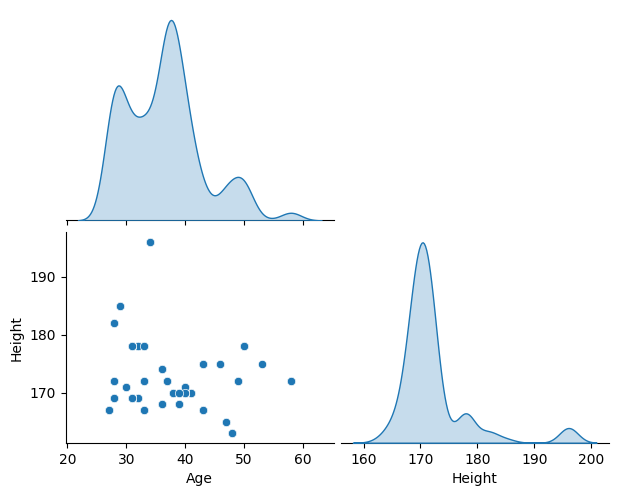

In [17]:
# Select the columns for the pair plot
x = ['Age', 'Height']
# Create the pair plot
sns.pairplot(data[x], kind='scatter', diag_kind='kde', corner=True, aspect=1.25)
# Display the plot
plt.show()

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,774.0,17.980620,10.941968,1.0,10.0,18.0,28.0,36.0
Age,774.0,36.427649,6.565960,27.0,31.0,37.0,40.0,58.0
Days since previous absence,755.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Transportation expense,774.0,222.351421,66.869052,118.0,179.0,225.0,260.0,388.0
Distance from Residence to Work,774.0,29.673127,14.869258,5.0,16.0,26.0,50.0,52.0
Estimated commute time,774.0,59.034884,31.252758,5.0,29.0,52.0,94.0,114.0
Years until retirement,774.0,26.649871,9.362066,-1.0,25.0,28.0,33.0,38.0
Education,774.0,1.284238,0.662689,1.0,1.0,1.0,1.0,4.0
Number of children,774.0,1.060724,1.122593,0.0,0.0,1.0,2.0,4.0
Number of pets,774.0,0.749354,1.328061,0.0,0.0,0.0,1.0,8.0


* criar categorias no BMI tp overweight e afins
* Custo de transporte por km -> Transportation expense/Distance from Residence to Work
* Tempo de trajeto por km -> Estimated commute time/Distance from Residence to Work
* tentar calcular number of absences per year
* Preencher as seasons a partir do mês do ano
* Primavera: Março, Abril, Maio.
Verão: Junho, Julho, Agosto.
Outono: Setembro, Outubro, Novembro.
Inverno: Dezembro, Janeiro, Fevereiro
* Dropar days since previous absence